In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
# F1 Metric
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope


from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val


with custom_object_scope({'f1_score': f1_score}):
    model = load_model('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/FINAL'
                       '/results_/simmodel.h5')

# Assuming you know the order of classes in your trained model:
class_index_for_knife = 0
class_index_for_gun = 1

def sliding_window(image, stepSize, windowSize):
    for y in range(0, image.shape[0] - windowSize[1] + 1, stepSize):
        for x in range(0, image.shape[1] - windowSize[0] + 1, stepSize):
            print(f"X: {x}, Y: {y}")
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])



def detect_weapon(image_path):
    image = cv2.imread(image_path)
    detected_coords = []

    for (x, y, window) in sliding_window(image, stepSize=10, windowSize=(100, 100)):
        # If the window does not meet our desired window size, ignore it
        if window.shape[0] != 100 or window.shape[1] != 100:
            continue

        # Prepare window for prediction
        window = cv2.resize(window, (150, 150))
        window = window.astype("float") / 255.0
        window = img_to_array(window)
        window = np.expand_dims(window, axis=0)

        # Predict using your model
        pred = model.predict(window)

        # If knife is detected, save the coordinates and color
        if np.argmax(pred) == class_index_for_knife:
            detected_coords.append((x, y, x+100, y+100, (255, 0, 0)))  # Blue for knife

        # If gun is detected, save the coordinates and color
        if np.argmax(pred) == class_index_for_gun:
            detected_coords.append((x, y, x+100, y+100, (0, 0, 255)))  # Red for gun

    # Draw the detected boxes with their respective colors
    for (startX, startY, endX, endY, color) in detected_coords:
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

    for (x, y, window) in sliding_window(image, stepSize=10, windowSize=(100, 100)):
        print(f"Processing window at X: {x}, Y: {y}")


    # Display the detected boxes
    cv2.imshow("Weapon Detection", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

detect_weapon('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/data/big'
              '/weapons/weapon_detection/BN-NE957_0322BE_M_20160322103251.jpg')


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

1/1 [==============================] - 0s 95ms/step
Predicting image...
1/1 [==============================] - 0s 24ms/step
Loading the original image...


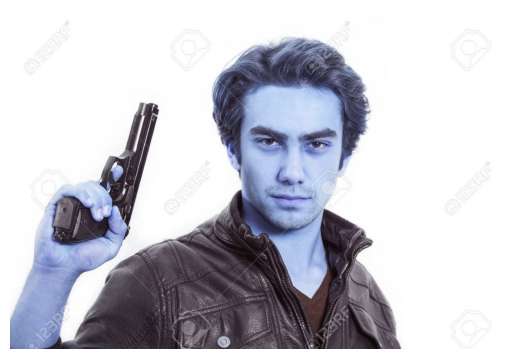

In [6]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import custom_object_scope
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

with custom_object_scope({'f1_score': f1_score}):
    model = load_model('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/FINAL'
                       '/results_/simmodel.h5')
# model = load_model('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/FINAL'
#                    '/results_/simmodel.h5')




def predict_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])

    return class_idx

def overlay_classification(img_path):
    # Predict image class
    class_idx = predict_image(img_path)

    # Load the original image
    image = cv2.imread(img_path)

    # If weapon is detected, overlay text
    if class_idx == 0:  # Adjust based on your category mapping
        label = "Weapon"
        color = (0, 0, 255)  # Red
        cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    else:
        label = "No Weapon"
        color = (0, 255, 0)  # Green
        cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

draw_rectangle('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/38210045'
               '-the-man-holding-a-gun.jpg')


In [3]:
import tensorflow as tf
import cv2
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# Load a pre-trained object detection model
# Load the trained model
model_path = 'C:/Users/mupaj/Documents/Apps/cv_weapon_detection/FINAL/results_/simmodel.h5'
model = load_model(model_path, custom_objects={'f1_score': f1_score})


def detect_weapon(image_path, threshold=0.5):
    # Load image using OpenCV
    img = cv2.imread(image_path)
    original_img = img.copy()

    # Preprocess the image (resize, reshape and rescale)
    img = cv2.resize(img, (150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    # Predict the image
    prediction = model.predict(img)

    # Check if weapon is detected
    # if prediction >= threshold:
    if prediction[0][0] >= threshold:

        # For this example, we'll draw a square around the entire image,
        # since the model doesn't provide specific location of the weapon.
        # If you've a localization model, you'll use detected coordinates.
        cv2.rectangle(original_img, (0, 0), (original_img.shape[1], original_img.shape[0]), (0, 0, 255), 2)

    # Display the image
    cv2.imshow('Weapon Detection', original_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Test the function
detect_weapon('C:/Users/mupaj/Documents/Apps/cv_weapon_detection/istockphoto-1322277517-612x612.jpg')


1/1 [==============================] - 0s 151ms/step
